In [14]:
%matplotlib inline

## Introduction

In this tutorial, we’ll see how to create and launch a face detection algorithm in Python using OpenCV and Dlib. will go through the most basic implementations of face detection including Cascade Classifiers, HOG windows and Deep Learning CNNs.


We’ll cover face detection using :

1. Haar Cascade Classifiers using OpenCV
2. Deep Learning based Face Detector in OpenCV
3. Histogram of Oriented Gradients using Dlib
4. Convolutional Neural Networks using Dlib

## Requirements

The first step is to install OpenCV, and Dlib.

### OpenCV
OpenCV, an open source library for computer vision, written in C/C++, that has interfaces in C++, Python and Java. It supports Windows, Linux, MacOS, iOS and Android.

Installing OpenCV ----> pip install opencv-python

### NumPy
Installing NumPy -----> pip install numpy

### Imutils
Installing Imutils -----> pip install imutils

### Dlib
pip install dlib

Note:
Installing Dlib is bit tricky and most of the time it throws up an error "unable to build dlib setup.py". If yor are facing the same problem then dont worry I have a solution for you and it works everytime!!!!!!

1. For Python 3.6 windows-
just run the following command

pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f

2. For Other versions of Python for both Ubuntu and Windows - 

i) Install Boost - pip install boost

ii) Install Visual Studio

iii) Install Cmake

iv) Install numpy+mkl

v) lastly, install dlib - pip install dlib

Works like magic!!!!!


Installing Dlib GPU is also bit tricky and if you all want me to cover it then like the subscribe button to stay updated as we are coming soon with how to install DLIB CPU and GPU.... HAPPY Coding!!!!

## 1. Cascade Classifiers

Cascade classifier, or namely cascade of boosted classifiers working with haar-like features, is a special case of ensemble learning, called boosting. It typically relies on Adaboost classifiers (and other models such as Real Adaboost, Gentle Adaboost or Logitboost). Cascade classifiers are trained on a few hundred sample images of image that contain the object we want to detect, and other images that do not contain those images.

How can we detect if a face is there or not ? There is an algorithm, called Viola–Jones object detection framework, that includes all the steps required for live face detection :

1. Haar Feature Selection, features derived from Haar wavelets
2. Create integral image
3. Adaboost Training
4. Cascading Classifiers

The original paper was published in 2001.

#### Haar Feature Selection
There are some common features that we find on most common human faces :
1. A dark eye region compared to upper-cheeks
2. A bright nose bridge region compared to the eyes
3. Some specific location of eyes, mouth, nose

The characteristics are called Haar Features. The feature extraction process will look like this :

<img src="./file/haarcascade.png">
In this example, the first feature measures the difference in intensity between the region of the eyes and a region across the upper cheeks. The feature value is simply computed by summing the pixels in the black area and subtracting the pixels in the white area.

<img src="./file/haarcascade1.png">

Then, we apply this rectangle as a convolutional kernel, over our whole image. In order to be exhaustive, we should apply all possible dimensions and positions of each kernel. A simple 24*24 images would typically result in over 160’000 features, each made of a sum/subtraction of pixels values. It would computationally be impossible for live face detection. So, how do we speed up this process ?
1. once the good region has been identified by a rectangle, it is useless to run the window over a completely different region of the image. This can be achieved by Adaboost.
2. compute the rectangle features using the integral image principle, which is way faster. We’ll cover this in the next section.

Now that the features have been selected, we apply them on the set of training images using Adaboost classification, that combines a set of weak classifiers to create an accurate ensemble model. With 200 features (instead of 160’000 initially), an accuracy of 95% is achieved. The authors of the paper have selected 6’000 features.

Integral Image:
To quote an answer on quora - https://www.quora.com/How-integral-image-is-used-in-image-processing-and-how-improves-the-computation-time

Integral image is an image we get by cumulative addition of intensities on subsequent pixels in both horizontal and vertical axis.
In image processing, we generally rely on features specific to certain regions of the entire image. Hence, we need properties of those specific regions

Adaboost algorithm:
<img src="./file/adaboost.png">

The above algorithm shows the steps taken to choose the appropriate classifiers

Haar Cascade in detail - https://towardsdatascience.com/a-guide-to-face-detection-in-python-3eab0f6b9fc1

More Haar Features in OpenCV - https://github.com/opencv/opencv/tree/master/data/haarcascades

### Code

#### Image 

In [15]:
import cv2
import matplotlib.pyplot as plt

def detectHC(imgpath):
    cascPath = "./haarcascades/haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)


    font = cv2.FONT_HERSHEY_SIMPLEX

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),3)
    plt.imshow(frame)
    plt.show()


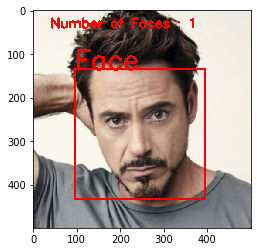

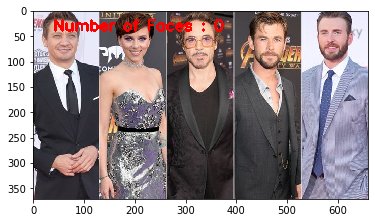

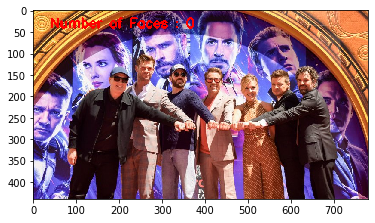

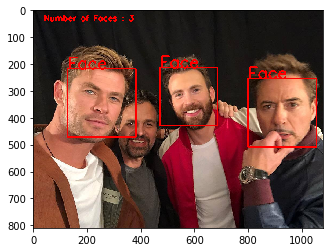

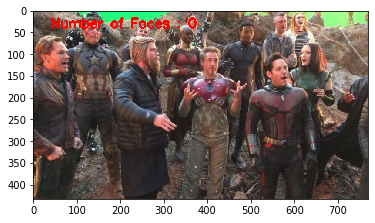

In [16]:
detectHC('./data/tony.jpg')
detectHC('./data/group.jpg')
detectHC('./data/groupsmall.jpg')
detectHC('./data/groupbig.jpg')
detectHC('./data/groupangle.jpeg')


#### Video 

In [17]:
import cv2

def detectVidHC(vidPath):
    cascPath = "./haarcascades/haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)
    font = cv2.FONT_HERSHEY_SIMPLEX
    video_capture = cv2.VideoCapture(vidPath)
    
    
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')


    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(200, 200),
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

        cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
        # Display the resulting frame

        cv2.imshow('Video', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
          break

    # When everything is done, release the capture
    video_capture.release()
    cv2.destroyAllWindows()

In [18]:
detectVidHC('./data/videoplayback.mp4')

#### Real-Time

In [2]:
import cv2


cascPath = "./haarcascades/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

font = cv2.FONT_HERSHEY_SIMPLEX
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

### Pros
1. Works almost real-time on CPU
2. Simple Architecture
3. Detects faces at different scales

### Cons
1. The major drawback of this method is that it gives a lot of False predictions.
2. Doesn’t work on non-frontal images.
3. Doesn’t work under occlusion

## 2. DNN Face Detector in OpenCV

This model was included in OpenCV from version 3.3.
It is based on Single-Shot-Multibox detector and uses ResNet-10 Architecture as the backbone. The model was trained using images available from the web.

OpenCV provides 2 models for this face detector.
1. Floating point 16 version of the original caffe implementation
2. 8 bit quantized version using Tensorflow

We have included both the models in 'model' folder but we are going to use original caffee implementation.

#### Image

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectDNN(imgpath):
    modelFile = "./model/res10_300x300_ssd_iter_140000.caffemodel"
    configFile = "./model/deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()
    #[,frame,number of detection,[classid,class score,conf,x,y,h,w]]
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 3)

    # show the output image
    plt.imshow( frame)
    plt.show()

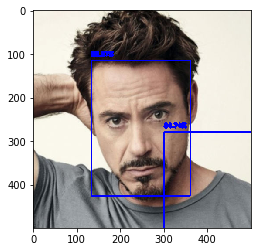

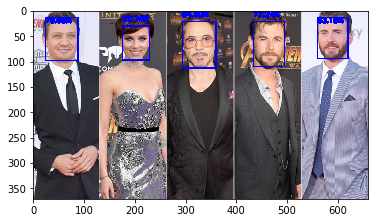

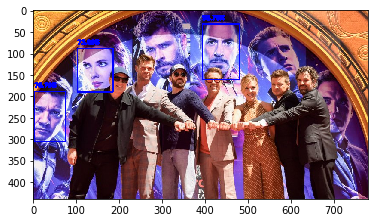

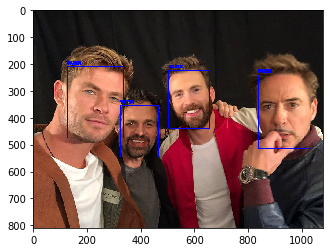

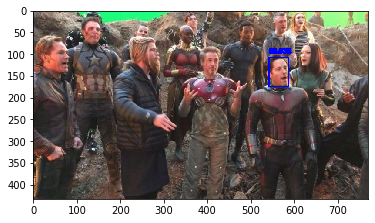

In [20]:
detectDNN('./data/tony.jpg')
detectDNN('./data/group.jpg')
detectDNN('./data/groupsmall.jpg')
detectDNN('./data/groupbig.jpg')
detectDNN('./data/groupangle.jpeg')


#### Video

In [21]:
import cv2
import numpy as np
import imutils

def detectVidDNN(vidpath):

    modelFile = "./model/res10_300x300_ssd_iter_140000.caffemodel"
    configFile = "./model/deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
    video_capture = cv2.VideoCapture(vidpath)
    
    #fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    #out = cv2.VideoWriter('outputopenCVDNN1.avi',fourcc,20.0,(int(video_capture.get(3)),int(video_capture.get(4))))
    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()
        # grab the frame dimensions and convert it to a blob
        (h, w) = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
            (300, 300), (104.0, 177.0, 123.0))

        # pass the blob through the network and obtain the detections and
        # predictions
        net.setInput(blob)
        detections = net.forward()

        # loop over the detections
        for i in range(0, detections.shape[2]):
            # extract the confidence (i.e., probability) associated with the
            # prediction
            confidence = detections[0, 0, i, 2]

            # filter out weak detections by ensuring the `confidence` is
            # greater than the minimum confidence
            if confidence < 0.5:
                continue

            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

        # show the output frame
        #out.write(frame)
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break
    #out.release()
    # do a bit of cleanup
    cv2.destroyAllWindows()
    video_capture.release()



In [22]:
detectVidDNN('./data/videoplayback.mp4')

NameError: name 'out' is not defined

#### Real Time

In [1]:
import cv2
import numpy as np
import imutils

modelFile = "./model/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "./model/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    frame = imutils.resize(frame, width=750)

    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))


    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        if confidence < 0.5:
            continue

        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),
            (0, 0, 255), 2)
        cv2.putText(frame, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
video_capture.release()



### Pros
The method has the following merits :
1. Most accurate out of the four methods when CPU
2. Runs at real-time on CPU
3. Works for different face orientations – up, down, left, right, side-face etc.
4. Works even under substantial occlusion
5. Detects faces across various scales ( detects big as well as tiny faces )

### Cons
1. Not very accurate

## 3. Histogram of Oriented Gradients (HOG) in Dlib

One of the most popular implement for face detection is offered by Dlib and uses a concept called Histogram of Oriented Gradients (HOG). This is an implementation of the original paper by Dalal and Triggs - https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf

The model is built out of 5 HOG filters – front looking, left looking, right looking, front looking but rotated left, and a front looking but rotated right. The model comes embedded in the header(https://github.com/davisking/dlib/blob/master/dlib/image_processing/frontal_face_detector.h) file itself.

The dataset used for training, consists of 2825 images which are obtained from LFW dataset and manually annotated by Davis King, the author of Dlib. It can be downloaded from here - http://vis-www.cs.umass.edu/lfw/.

The idea behind HOG is to extract features into a vector, and feed it into a classification algorithm like a Support Vector Machine for example that will assess whether a face (or any object you train it to recognize actually) is present in a region or not.

The features extracted are the distribution (histograms) of directions of gradients (oriented gradients) of the image. Gradients are typically large around edges and corners and allow us to detect those regions.

In the original paper, the process was implemented for human body detection, and the detection chain was the following :

<img src="./file/hog.png">


#### Computing the gradient images
The first step is to compute the horizontal and vertical gradients of the image, by applying the following kernels :

<img src="./file/gradient.PNG">

The gradient of an image typically removes non-essential information.

#### Compute tyhe HOG

The image is then divided into 8x8 cells to offer a compact representation and make our HOG more robust to noise. Then, we compute a HOG for each of those cells.

To estimate the direction of a gradient inside a region, we simply build a histogram among the 64 values of the gradient directions (8x8) and their magnitude (another 64 values) inside each region. The categories of the histogram correspond to angles of the gradient, from 0 to 180°. Ther are 9 categories overall : 0°, 20°, 40°… 160°.

We then calculate 2 information :
1. Direction of the gradient
2. Magnitude of the gradient

When we build the HOG, there are 3 subcases :
1. The angle is smaller than 160° and not halfway between 2 classes. In such case, the angle will be added in the right category of the HOG
2. The angle is smaller than 160° and exactly between 2 classes. In such case, we consider an equal contribution to the 2 nearest classes and split the magnitude in 2
<img src="./file/hog1.png">

3. the angle is larger than 160°. In such case, we consider that the pixel contributed proportionally to 160° and to 0°.
<img src="./file/hog2.png">

The HOG looks like this for each 8x8 cell :
<img src="./file/hog3.png">

#### Block normalization
Finally, a 16x16 block can be applied in order to normalize the image and make it invariant to lighting for example. This is simply achieved by dividing each value of the HOG of size 8x8 by the L2-norm of the HOG of the 16x16 block that contains it, which is in fact a simple vector of length 9*4 = 36.

Finally, all the 36x1 vectors are concatenated into a large vector. And we are done ! We have our feature vector, on which we can train a soft SVM classifier.
![SegmentLocal](file/hog.gif "segment")

  


#### Code

#### Image

In [23]:

import cv2
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt
def detectDlib(imgpath):
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_detect = dlib.get_frontal_face_detector()
    rects = face_detect(gray, 1)
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)
    plt.imshow(frame)
    plt.show()

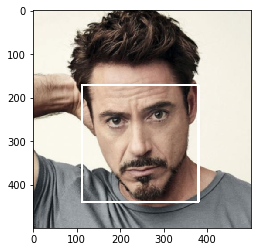

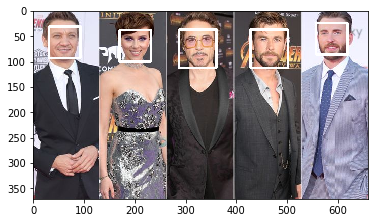

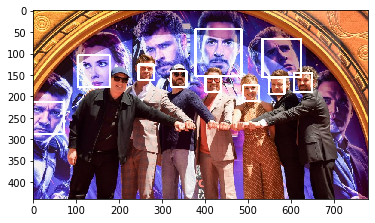

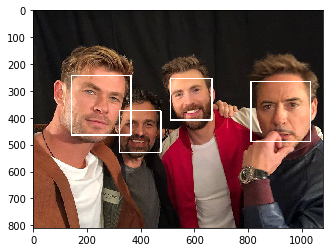

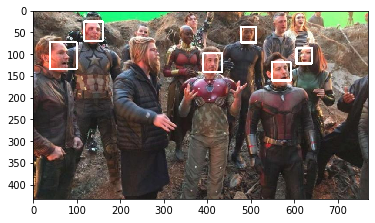

In [24]:
detectDlib('./data/tony.jpg')
detectDlib('./data/group.jpg')
detectDlib('./data/groupsmall.jpg')
detectDlib('./data/groupbig.jpg')
detectDlib('./data/groupangle.jpeg')


#### Video

In [25]:
import cv2
import dlib
from imutils import face_utils
def detectVidHOG(vidpath):
    video_capture = cv2.VideoCapture(vidpath)
    flag = 0

    #fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    #out = cv2.VideoWriter('outputHOG.avi',fourcc,20.0,(int(video_capture.get(3)),int(video_capture.get(4))))
    while True:

        ret, frame = video_capture.read()
        #frame = cv2.resize(frame,(256,256))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face_detect = dlib.get_frontal_face_detector()

        rects = face_detect(gray, 1)
        
        for (i, rect) in enumerate(rects):

            (x, y, w, h) = face_utils.rect_to_bb(rect)

            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
        #out.write(frame)
        cv2.imshow('Video', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

In [26]:
detectVidHOG('./data/videoplayback.mp4')

#### Real Time

In [6]:
import cv2
import dlib
from imutils import face_utils

video_capture = cv2.VideoCapture(0)
flag = 0

while True:

    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray, 1)

    for (i, rect) in enumerate(rects):

        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

### Pros
2. Works very well for frontal and slightly non-frontal faces
3. Light-weight model as compared to CNN.
4. Works under small occlusion
5. Basically, this method works under most cases except a few as discussed below.

### Cons
1. The major drawback is that it does not detect small faces as it is trained for minimum face size of 80×80. Thus, you need to make sure that the face size should be more than that in your application. You can however, train your own face detector for smaller sized faces.
2. The bounding box often excludes part of forehead and even part of chin sometimes.
3. Does not work very well under substantial occlusion
4. Does not work for side face and extreme non-frontal faces, like looking down or up.
5. Reaaly slow for real time detections

## 4. MMOD Convolutional Neural Network in Dlib

It uses a Maximum-Margin Object Detector(MMOD) with CNN based features. The training process for this method is very simple and you don’t need a large amount of data to train a custom object detector. For more information on training, visit the website - http://blog.dlib.net/2016/10/easily-create-high-quality-object.html

The model can be downloaded from the dlib-models repository (https://github.com/davisking/dlib-models).
It uses a dataset manually labeled by its Author, Davis King, consisting of images from various datasets like ImageNet, PASCAL VOC, VGG, WIDER, Face Scrub. It contains 7220 images. The dataset can be downloaded from http://dlib.net/files/data/dlib_face_detection_dataset-2016-09-30.tar.gz


Convolutional Neural Network (CNN) are feed-forward neural network that are mostly used for computer vision. They offer an automated image pre-treatment as well as a dense neural network part. CNNs are special types of neural networks for processing datas with grid-like topology. The architecture of the CNN is inspired by the visual cortex of animals.
In previous approaches, a great part of the work was to select the filters in order to create the features in order to extract as much information from the image as possible. With the rise of deep learning and greater computation capacities, this work can now be automated. The name of the CNNs comes from the fact that we convolve the initial image input with a set of filters. The parameter to choose remains the number of filters to apply, and the dimension of the filters. The dimension of the filter is called the stride length. Typical values for the stride lie between 2 and 5.
Convolution Cheat sheet - http://cs231n.github.io/convolutional-networks/

<img src="./file/cnn.png">

The output of the CNN in this specific case is a binary classification, that takes value 1 if there is a face, 0 otherwise.

#### Code
The first step is to download the pre-trained model here - https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2

Move the weights to your model folder.

#### Image

In [27]:
import cv2
import dlib
from imutils import face_utils
def detectDlibDNN(imgpath):
    
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    dnnFaceDetector = dlib.cnn_face_detection_model_v1("./model/mmod_human_face_detector.dat")
    rects = dnnFaceDetector(gray, 1)
    for (i, rect) in enumerate(rects):
        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    plt.imshow(frame)
    plt.show()

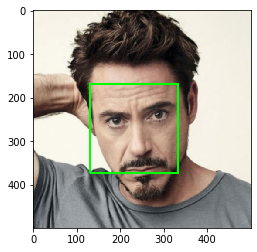

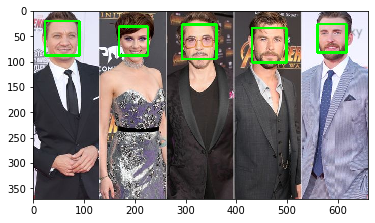

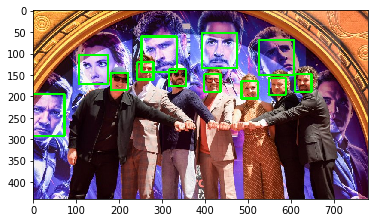

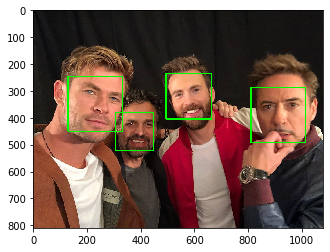

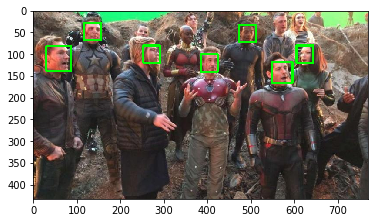

In [28]:
detectDlibDNN('./data/tony.jpg')
detectDlibDNN('./data/group.jpg')
detectDlibDNN('./data/groupsmall.jpg')
detectDlibDNN('./data/groupbig.jpg')
detectDlibDNN('./data/groupangle.jpeg')


#### Video

In [4]:
import cv2
import dlib
from imutils import face_utils
def detectVidDlibCNN(vidpath):

    video_capture = cv2.VideoCapture(vidpath)
    flag = 0
    dnnFaceDetector = dlib.cnn_face_detection_model_v1("./model/mmod_human_face_detector.dat")

    
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    out = cv2.VideoWriter('outputHOG.avi',fourcc,20.0,(int(video_capture.get(3)),int(video_capture.get(4))))
    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()
        #frame  = cv2.resize(frame,(512,512))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = dnnFaceDetector(gray, 1)

        for (i, rect) in enumerate(rects):

            x1 = rect.rect.left()
            y1 = rect.rect.top()
            x2 = rect.rect.right()
            y2 = rect.rect.bottom()

            # Rectangle around the face
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the video output
        out.write(frame)
        cv2.imshow('Video', frame)

        # Quit video by typing Q
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

In [5]:
detectVidDlibCNN('./data/videoplayback.mp4')

#### Real Time

In [3]:
import cv2
import dlib
from imutils import face_utils

video_capture = cv2.VideoCapture(0)
flag = 0
dnnFaceDetector = dlib.cnn_face_detection_model_v1("./model/mmod_human_face_detector.dat")

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = dnnFaceDetector(gray, 1)

    for (i, rect) in enumerate(rects):

        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the video output
    cv2.imshow('Video', frame)

    # Quit video by typing Q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

### Pros
1. Works for different face orientations
2. Robust to occlusion
3. Works very fast on GPU
4. Very easy training process

### Cons
1. Very slow on CPU
2. Does not detect small faces as it is trained for minimum face size of 80×80. Thus, you need to make sure that the face size should be more than that in your application. You can however, train your own face detector for smaller sized faces.
3. The bounding box is even smaller than the HoG detector.

## Comparison
CPU:
Hog is the most accurate on CPU. However Har cascade is the fastest. OpenCV dnn is a good tradeoff between speed and accuracy on CPU.

GPU:
However, CNNs in Dlib tend to be the most accurate algorithm but they they don't work on smaller faces(which can be fixed by training on your own custom dataset). HoG also perform pretty well but have some issues identifying small faces. 



## Credits

1. A guide to Face Detection in Python - https://towardsdatascience.com/a-guide-to-face-detection-in-python-3eab0f6b9fc1
2. Face Detection – OpenCV, Dlib and Deep Learning ( C++ / Python ) - https://www.learnopencv.com/face-detection-opencv-dlib-and-deep-learning-c-python/
